In [ ]:
pip install ucimlrepo

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from ucimlrepo import fetch_ucirepo 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Model


In [2]:
# Get data
dataset = fetch_ucirepo(id=17) 

# Checking for null values
print(dataset.data.features.isnull().sum())

# Cleaning process is skipped as there is no missing or null value

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [3]:
# Split into features and target 
X = dataset.data.features
y = dataset.data.targets

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Feature scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression().fit(X_train, y_train)

# Evaluate models on test set
print('Logistic Regression Model Accuracy:', model.score(X_test, y_test))

Logistic Regression Model Accuracy: 0.9707602339181286


c:\Users\nimis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


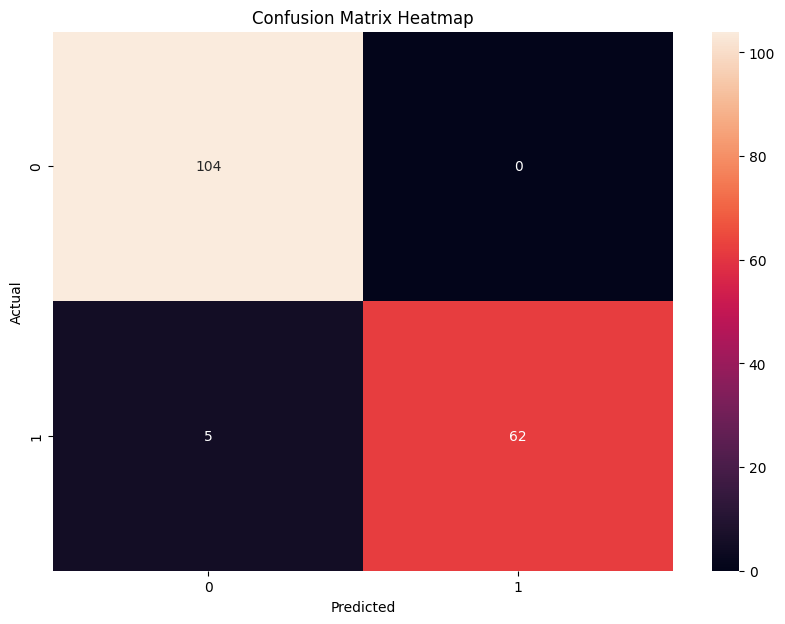

In [13]:
# Predict on test set
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()